# Centrality Measures

<a href=https://networkx.github.io/documentation/networkx-1.10/index.html> <u><b>doc of networkx</b></u> </a>

## dataset: small_trains

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/small_trains.csv')

In [2]:
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,avg_delay_all_departing,avg_delay_all_arriving,num_late_at_departure,num_arriving_late,delay_cause,delayed_number
0,2017,9,National,PARIS EST,METZ,85.133779,299,0.752007,0.419844,15,17.0,delay_cause_external_cause,0.250000
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1.263518,1.137558,10,23.0,delay_cause_external_cause,0.250000
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1.139257,1.586396,20,19.0,delay_cause_external_cause,0.214286
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1.406215,4.788542,36,61.0,delay_cause_external_cause,0.155172
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,1.728947,6.008860,16,38.0,delay_cause_external_cause,0.166667


In [3]:
data = df[['departure_station', 'arrival_station']]
data.head()

,departure_station,arrival_station
0,PARIS EST,METZ
1,REIMS,PARIS EST
2,PARIS EST,STRASBOURG
3,PARIS LYON,AVIGNON TGV
4,PARIS LYON,BELLEGARDE (AIN)


## networkX

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

### nx.from_pandas_edgelist()

In [5]:
G = nx.from_pandas_edgelist(df=data, source='departure_station', target='arrival_station', create_using=nx.DiGraph)

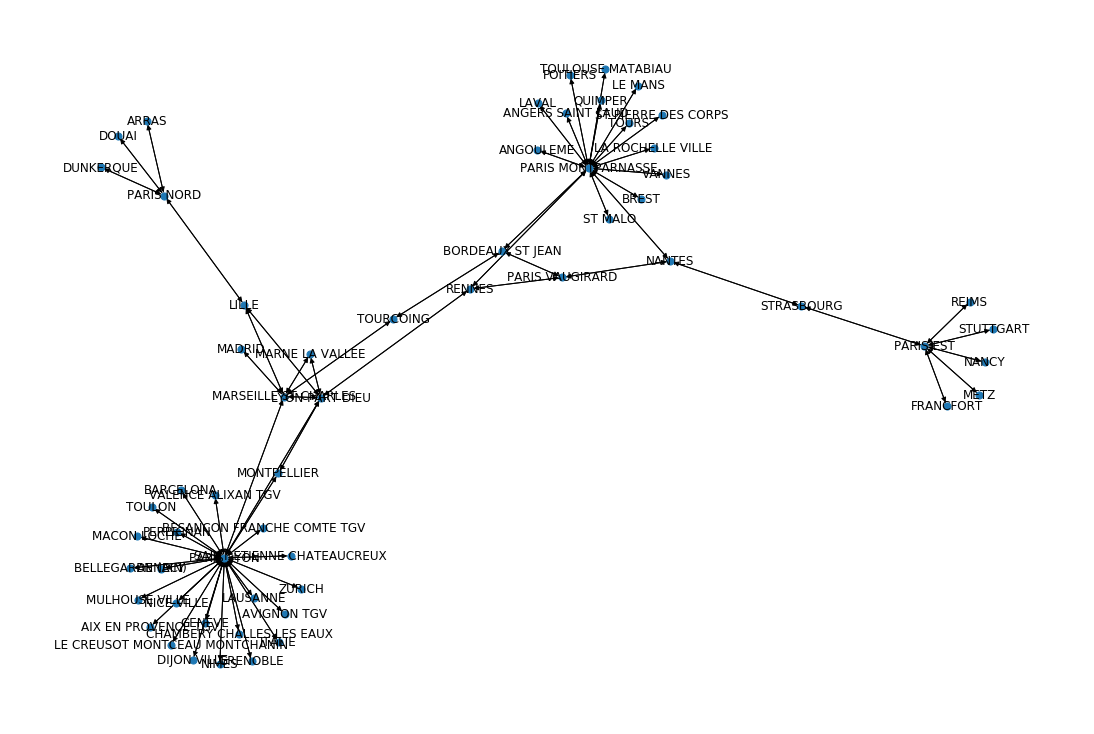

In [6]:
plt.figure(figsize=(15,10))
nx.draw(G, node_size=50, with_labels=True)

In [7]:
import numpy as np
# inserting distance inf., using random.randint()

data['distance'] = np.random.randint(1, 100, size=data.shape[0])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
data.head()

,departure_station,arrival_station,distance
0,PARIS EST,METZ,72
1,REIMS,PARIS EST,85
2,PARIS EST,STRASBOURG,55
3,PARIS LYON,AVIGNON TGV,37
4,PARIS LYON,BELLEGARDE (AIN),88


In [9]:
G = nx.from_pandas_edgelist(data, 'departure_station', 'arrival_station', edge_attr='distance')

In [10]:
G.edges[('PARIS EST', 'METZ')]

{'distance': 10}

In [11]:
G.edges['METZ','PARIS EST']['cost'] = 10

G.edges['PARIS EST','METZ']['cost'] = 15

In [12]:
G.edges['METZ','PARIS EST']

{'distance': 10, 'cost': 15}

In [13]:
G.degree

DegreeView({'PARIS EST': 6, 'METZ': 1, 'REIMS': 1, 'STRASBOURG': 2, 'PARIS LYON': 25, 'AVIGNON TGV': 1, 'BELLEGARDE (AIN)': 1, 'BESANCON FRANCHE COMTE TGV': 1, 'CHAMBERY CHALLES LES EAUX': 1, 'GRENOBLE': 1, 'LYON PART DIEU': 6, 'MACON LOCHE': 1, 'MARSEILLE ST CHARLES': 6, 'MONTPELLIER': 2, 'MULHOUSE VILLE': 1, 'PARIS MONTPARNASSE': 16, 'ANGERS SAINT LAUD': 1, 'BORDEAUX ST JEAN': 3, 'LA ROCHELLE VILLE': 1, 'POITIERS': 1, 'RENNES': 3, 'VANNES': 1, 'LILLE': 3, 'FRANCFORT': 1, 'LAUSANNE': 1, 'DOUAI': 1, 'PARIS NORD': 4, 'NANCY': 1, 'LE CREUSOT MONTCEAU MONTCHANIN': 1, 'NICE VILLE': 1, 'ZURICH': 1, 'NANTES': 3, 'DUNKERQUE': 1, 'PERPIGNAN': 1, 'SAINT ETIENNE CHATEAUCREUX': 1, 'ST PIERRE DES CORPS': 1, 'VALENCE ALIXAN TGV': 1, 'DIJON VILLE': 1, 'LAVAL': 1, 'QUIMPER': 1, 'TOULOUSE MATABIAU': 1, 'ARRAS': 1, 'NIMES': 1, 'TOULON': 1, 'LE MANS': 1, 'STUTTGART': 1, 'GENEVE': 1, 'ITALIE': 1, 'ANGOULEME': 1, 'ST MALO': 1, 'TOURS': 1, 'BREST': 1, 'AIX EN PROVENCE TGV': 1, 'ANNECY': 1, 'TOURCOING': 2, 

In [14]:
G.nodes

NodeView(('PARIS EST', 'METZ', 'REIMS', 'STRASBOURG', 'PARIS LYON', 'AVIGNON TGV', 'BELLEGARDE (AIN)', 'BESANCON FRANCHE COMTE TGV', 'CHAMBERY CHALLES LES EAUX', 'GRENOBLE', 'LYON PART DIEU', 'MACON LOCHE', 'MARSEILLE ST CHARLES', 'MONTPELLIER', 'MULHOUSE VILLE', 'PARIS MONTPARNASSE', 'ANGERS SAINT LAUD', 'BORDEAUX ST JEAN', 'LA ROCHELLE VILLE', 'POITIERS', 'RENNES', 'VANNES', 'LILLE', 'FRANCFORT', 'LAUSANNE', 'DOUAI', 'PARIS NORD', 'NANCY', 'LE CREUSOT MONTCEAU MONTCHANIN', 'NICE VILLE', 'ZURICH', 'NANTES', 'DUNKERQUE', 'PERPIGNAN', 'SAINT ETIENNE CHATEAUCREUX', 'ST PIERRE DES CORPS', 'VALENCE ALIXAN TGV', 'DIJON VILLE', 'LAVAL', 'QUIMPER', 'TOULOUSE MATABIAU', 'ARRAS', 'NIMES', 'TOULON', 'LE MANS', 'STUTTGART', 'GENEVE', 'ITALIE', 'ANGOULEME', 'ST MALO', 'TOURS', 'BREST', 'AIX EN PROVENCE TGV', 'ANNECY', 'TOURCOING', 'MARNE LA VALLEE', 'BARCELONA', 'PARIS VAUGIRARD', 'MADRID'))

In [15]:
# number of nodes in a graph
G.order()

59

In [16]:
# number of edges in a graph
G.size()

65

In [17]:
# extra: calculate shortest path: 

nx.shortest_path(G, 'METZ','PARIS LYON', weight='cost')

['METZ',
 'PARIS EST',
 'STRASBOURG',
 'NANTES',
 'PARIS MONTPARNASSE',
 'RENNES',
 'LYON PART DIEU',
 'PARIS LYON']

In [18]:
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

Number of edges: 65
Average degree: 2.2033898305084745
Density: 0.03798947983635301


# nx.degree_centrality()

In [19]:
degree = nx.degree_centrality(G)
degree

{'PARIS EST': 0.10344827586206896,
 'METZ': 0.017241379310344827,
 'REIMS': 0.017241379310344827,
 'STRASBOURG': 0.034482758620689655,
 'PARIS LYON': 0.43103448275862066,
 'AVIGNON TGV': 0.017241379310344827,
 'BELLEGARDE (AIN)': 0.017241379310344827,
 'BESANCON FRANCHE COMTE TGV': 0.017241379310344827,
 'CHAMBERY CHALLES LES EAUX': 0.017241379310344827,
 'GRENOBLE': 0.017241379310344827,
 'LYON PART DIEU': 0.10344827586206896,
 'MACON LOCHE': 0.017241379310344827,
 'MARSEILLE ST CHARLES': 0.10344827586206896,
 'MONTPELLIER': 0.034482758620689655,
 'MULHOUSE VILLE': 0.017241379310344827,
 'PARIS MONTPARNASSE': 0.27586206896551724,
 'ANGERS SAINT LAUD': 0.017241379310344827,
 'BORDEAUX ST JEAN': 0.05172413793103448,
 'LA ROCHELLE VILLE': 0.017241379310344827,
 'POITIERS': 0.017241379310344827,
 'RENNES': 0.05172413793103448,
 'VANNES': 0.017241379310344827,
 'LILLE': 0.05172413793103448,
 'FRANCFORT': 0.017241379310344827,
 'LAUSANNE': 0.017241379310344827,
 'DOUAI': 0.01724137931034482

In [20]:
degree = pd.DataFrame.from_dict(degree, orient='index').reset_index()

degree.columns = ['Node', 'Degree Centrality']
degree.sort_values('Degree Centrality', ascending=False).head()

,Node,Degree Centrality
4,PARIS LYON,0.431034
15,PARIS MONTPARNASSE,0.275862
0,PARIS EST,0.103448
10,LYON PART DIEU,0.103448
12,MARSEILLE ST CHARLES,0.103448


# Betweenness Centrality
Compute the shortest-path betweenness centrality for nodes

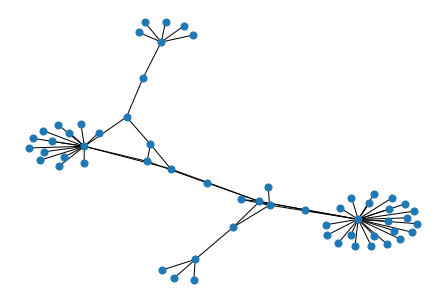

In [21]:
nx.draw(G, node_size=50)

In [22]:
# maior betweeness é o ponto que se você remover, afeta mais o grafo 
betweenness = nx.betweenness_centrality(G)
betweenness

{'PARIS EST': 0.1663641863278887,
 'METZ': 0.0,
 'REIMS': 0.0,
 'STRASBOURG': 0.18874773139745918,
 'PARIS LYON': 0.6199334543254689,
 'AVIGNON TGV': 0.0,
 'BELLEGARDE (AIN)': 0.0,
 'BESANCON FRANCHE COMTE TGV': 0.0,
 'CHAMBERY CHALLES LES EAUX': 0.0,
 'GRENOBLE': 0.0,
 'LYON PART DIEU': 0.49914297237346245,
 'MACON LOCHE': 0.0,
 'MARSEILLE ST CHARLES': 0.11474087517644686,
 'MONTPELLIER': 0.0,
 'MULHOUSE VILLE': 0.0,
 'PARIS MONTPARNASSE': 0.4890602944141964,
 'ANGERS SAINT LAUD': 0.0,
 'BORDEAUX ST JEAN': 0.03105464811453923,
 'LA ROCHELLE VILLE': 0.0,
 'POITIERS': 0.0,
 'RENNES': 0.4487799959669288,
 'VANNES': 0.0,
 'LILLE': 0.13067150635208713,
 'FRANCFORT': 0.0,
 'LAUSANNE': 0.0,
 'DOUAI': 0.0,
 'PARIS NORD': 0.10163339382940109,
 'NANCY': 0.0,
 'LE CREUSOT MONTCEAU MONTCHANIN': 0.0,
 'NICE VILLE': 0.0,
 'ZURICH': 0.0,
 'NANTES': 0.21879411171607185,
 'DUNKERQUE': 0.0,
 'PERPIGNAN': 0.0,
 'SAINT ETIENNE CHATEAUCREUX': 0.0,
 'ST PIERRE DES CORPS': 0.0,
 'VALENCE ALIXAN TGV': 0.0,
 

In [23]:
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
4,PARIS LYON,0.619933
10,LYON PART DIEU,0.499143
15,PARIS MONTPARNASSE,0.489060
20,RENNES,0.448780
31,NANTES,0.218794


# Pagerank
Pagerank mede a relevância de um nó baseado não só em quantos vizinhos ele tem, mas também medindo quantos vizinhos importantes ele tem

In [24]:
pagerank = nx.pagerank(G)

pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'PageRank Centrality']
pagerank.sort_values('PageRank Centrality', ascending=False).head()

,Node,PageRank Centrality
4,PARIS LYON,0.182676
15,PARIS MONTPARNASSE,0.115534
0,PARIS EST,0.050158
12,MARSEILLE ST CHARLES,0.037562
10,LYON PART DIEU,0.036688


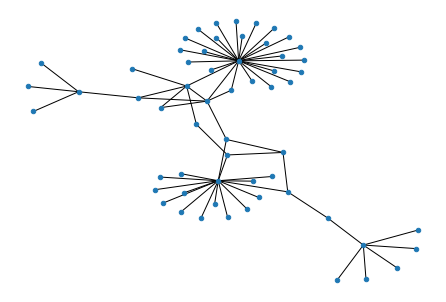

In [25]:
nx.draw_kamada_kawai(G, node_size=20,)

# Ego graph

In [26]:
nx.ego_graph(G, 'PARIS EST', radius=1)

[('PARIS EST', 0.6666666666666666),
 ('NANTES', 0.3333333333333333),
 ('STRASBOURG', 0.2222222222222222),
 ('PARIS MONTPARNASSE', 0.1111111111111111),
 ('STUTTGART', 0.1111111111111111),
 ('METZ', 0.1111111111111111),
 ('PARIS VAUGIRARD', 0.1111111111111111),
 ('FRANCFORT', 0.1111111111111111),
 ('NANCY', 0.1111111111111111),
 ('REIMS', 0.1111111111111111)]

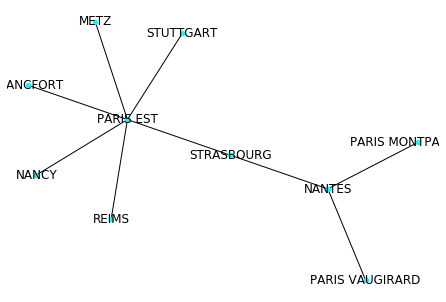

In [27]:
ego = nx.ego_graph(G, 'PARIS EST', radius=3)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

sorted(nx.degree_centrality(ego).items(), key=lambda x : x[1], reverse=True)

# Flux application

# Converting non-graph dataframes to edge lists

## Simpsons Network

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-27/simpsons-guests.csv', sep='|')
df

,season,number,production_code,episode_title,guest_star,role
0,1,002–102,7G02,Bart the Genius,Marcia Wallace,Edna Krabappel; Ms. Melon
1,1,003–103,7G03,Homer's Odyssey,Sam McMurray,Worker
2,1,003–103,7G03,Homer's Odyssey,Marcia Wallace,Edna Krabappel
3,1,006–106,7G06,Moaning Lisa,Miriam Flynn,Ms. Barr
4,1,006–106,7G06,Moaning Lisa,Ron Taylor,Bleeding Gums Murphy
...,...,...,...,...,...,...
1381,30,661–3022,YABF15,Woo-Hoo Dunnit?,Jackie Mason,Rabbi Hyman Krustofsky
1382,30,661–3022,YABF15,Woo-Hoo Dunnit?,Liev Schreiber,Dateline: Springfield Narrator
1383,30,662–3023,YABF16,Crystal Blue-Haired Persuasion,Illeana Douglas,New Age Clerk
1384,30,662–3023,YABF16,Crystal Blue-Haired Persuasion,Werner Herzog,Walter Hotenhoffer


In [29]:
def df_to_graph(df, node, edge):
    ''' 
    Transform a dataframe into another dataframe suitable to work with graphs.
    '''
    
    
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{node}_x', f'{node}_y']).count().reset_index()
    graph_df = graph_df.query(f'{node}_x != {node}_y')
 
    if type(edge) == list:
        graph_df = graph_df.loc[:, [node + '_x', node + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [node + '_x', node + '_y', edge]]
             
        
        
    return graph_df.rename(columns={f'{node}_x':f'{node}_src', 
                                    f'{node}_y':f'{node}_dest'})


In [30]:
graph_df = df_to_graph(df, 'guest_star', 'episode_title')
graph_df.sort_values(by='episode_title')

,guest_star_src,guest_star_dest,episode_title
2,50 Cent,Dana Gould,1
2734,Michael Jackson,Kipp Lennon,1
2736,Michael Keaton,Bruce Vilanch,1
2737,Michael Keaton,Charles Napier,1
2738,Michael Keaton,Marcia Wallace,1
...,...,...,...
1602,Joe Mantegna,Marcia Wallace,8
2375,Marcia Wallace,Joe Mantegna,8
999,Frank Welker,Marcia Wallace,8
2438,Marcia Wallace,Phil Hartman,18


In [31]:
G = nx.from_pandas_edgelist(graph_df, 'guest_star_src', 'guest_star_dest')
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

Number of edges: 1669
Average degree: 4.5788751714677645
Density: 0.006289663697071105


,Node,Betweenness Centrality
5,Marcia Wallace,0.317746
6,Maurice LaMarche,0.082161
115,Jon Lovitz,0.060001
26,Phil Hartman,0.055232
46,Joe Mantegna,0.053040


In [32]:
pagerank = nx.pagerank(G, weight='edge')
pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'Pagerank Centrality']
pagerank.sort_values('Pagerank Centrality', ascending=False).head()

,Node,Pagerank Centrality
5,Marcia Wallace,0.054583
26,Phil Hartman,0.013763
6,Maurice LaMarche,0.013545
46,Joe Mantegna,0.012000
115,Jon Lovitz,0.008910


In [33]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, 'betweenness')

ValueError: Received invalid argument(s): edge_size

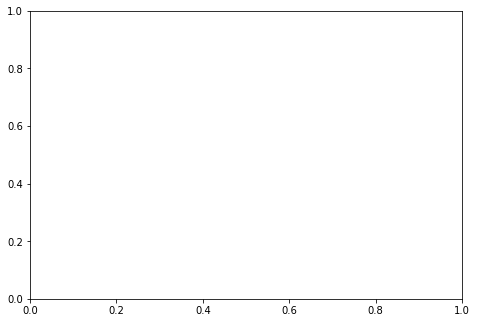

In [34]:
nx.draw(G, nodelist=bb.keys(), node_size=2, edge_size=2)

In [ ]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

In [ ]:
len(list(G.neighbors('Marcia Wallace')))

# Interactive Visualization

In [ ]:
# !pip install pyvis

In [ ]:
graph_df.head()

In [ ]:
from pyvis.network import Network

In [ ]:
g = Network(notebook=True)

In [ ]:
G.nodes()

In [ ]:
g.from_nx(G)

In [ ]:
g.show('test.html', )

# Game of Thrones Graph

In [ ]:
from pyvis.network import Network
import pandas as pd
url = 'https://www.macalester.edu/~abeverid/data/stormofswords.csv'
# https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv


got_net = Network(height="750px", width="100%", notebook=True)

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv(url)

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

# run through each edge and assign a value
for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

# get neighbors
neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show_buttons()
got_net.show("gameofthrones.html", )

In [ ]:
got_net.save_graph('got.html')

In [ ]:
# https://pyvis.readthedocs.io/en/latest/tutorial.html#visualization